In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ops').getOrCreate()

Exécuter la commande "%pip install pyspark" si ce n'est pas déjà fait afin d'installer la librairie "pyspark".

In [2]:
df1 = spark.read.csv('Fake News Poll Responses by Type and City.csv', inferSchema = True, header = True)
df1.show()

+--------------------+-------------+------------+
|      Event Category|         City|Total Events|
+--------------------+-------------+------------+
|Yes, I have heard...|      Chicago|         926|
|Yes, I have heard...|    (not set)|         797|
|Yes, I have heard...|       Dallas|         702|
|Yes, I'm good at ...|      Chicago|         581|
|Yes, I have heard...|     New York|         569|
|           Ignore it|      Chicago|         527|
|Yes, I'm good at ...|    (not set)|         497|
|           Ignore it|    (not set)|         470|
|Yes, I'm good at ...|       Dallas|         457|
|Yes, I have heard...|      Atlanta|         442|
|           Ignore it|       Dallas|         377|
|Yes, I'm good at ...|     New York|         348|
|Yes, I have heard...|  Los Angeles|         343|
|Yes, I have heard...|      Detroit|         332|
|Yes, I have heard...|   Washington|         331|
|           Ignore it|     New York|         311|
|No, I'm bad at sp...|      Chicago|         298|


In [3]:
df1.createOrReplaceTempView('table1')
query1 = spark.sql("select * from table1 where City != '(not set)'")
query1.show()

+--------------------+-------------+------------+
|      Event Category|         City|Total Events|
+--------------------+-------------+------------+
|Yes, I have heard...|      Chicago|         926|
|Yes, I have heard...|       Dallas|         702|
|Yes, I'm good at ...|      Chicago|         581|
|Yes, I have heard...|     New York|         569|
|           Ignore it|      Chicago|         527|
|Yes, I'm good at ...|       Dallas|         457|
|Yes, I have heard...|      Atlanta|         442|
|           Ignore it|       Dallas|         377|
|Yes, I'm good at ...|     New York|         348|
|Yes, I have heard...|  Los Angeles|         343|
|Yes, I have heard...|      Detroit|         332|
|Yes, I have heard...|   Washington|         331|
|           Ignore it|     New York|         311|
|No, I'm bad at sp...|      Chicago|         298|
|Yes, I have heard...|      Houston|         289|
|Yes, I have heard...|San Francisco|         282|
|Yes, I'm good at ...|      Atlanta|         279|


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

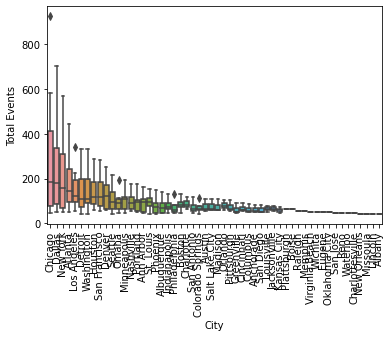

In [5]:
df1_pandas = query1.toPandas()
dfone = df1_pandas[0:200]
sns.boxplot(x = dfone['City'], y = dfone['Total Events'], data = dfone)
plt.xticks(rotation = 90)
plt.show()

In [6]:
df2 = spark.read.csv('Fake News Poll Total Responses by Type and State.csv', inferSchema = True, header = True)
df2.show()

+-------------+--------------+-----+
|     RESPONSE|         STATE|TOTAL|
+-------------+--------------+-----+
|Call them out|         Texas|  692|
|Call them out|    California|  583|
|Call them out|      New York|  577|
|Call them out|      Illinois|  509|
|Call them out|  Pennsylvania|  461|
|Call them out|      Michigan|  417|
|Call them out|          Ohio|  405|
|Call them out|    Washington|  290|
|Call them out|North Carolina|  288|
|Call them out|       Florida|  268|
|Call them out|       Georgia|  258|
|Call them out|     Tennessee|  239|
|Call them out|       Indiana|  228|
|Call them out|     Wisconsin|  226|
|Call them out|      Colorado|  225|
|Call them out|     Minnesota|  207|
|Call them out|      Missouri|  203|
|Call them out| Massachusetts|  201|
|Call them out|      Virginia|  190|
|Call them out|        Oregon|  176|
+-------------+--------------+-----+
only showing top 20 rows



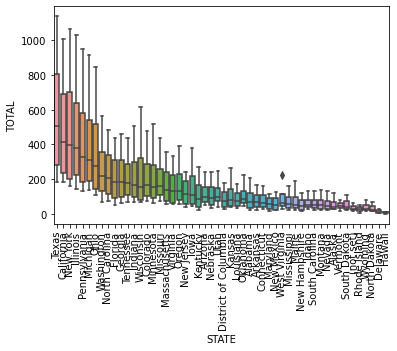

In [7]:
df2_pandas = df2.toPandas()
dftwo = df2_pandas[0:200]
sns.boxplot(x = dftwo['STATE'], y = dftwo['TOTAL'], data = dftwo)
plt.xticks(rotation = 90)
plt.show()